Atalov S.

# Дерево решений

### Как с помощью линейных моделей разделить точки на 2 класса?

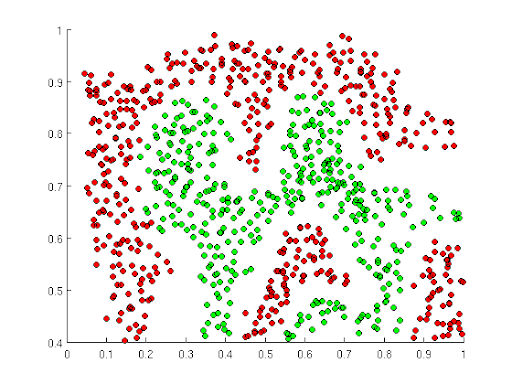

Рассмотрим простой пример классификации на примере Ирисок.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv', sep = ',')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'] = iris['Species'].map({'Iris-setosa': 0,
                                      'Iris-versicolor': 1,
                                      'Iris-virginica': 2})

На графике каждая точка это один цветок и по оси Х - длина лепестка, по оси Y - ширина лепестка.

Как через условия (if-else) сделать правило для разделения цветков?

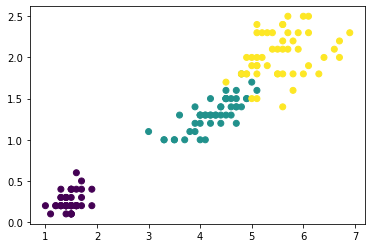

In [4]:
plt.scatter(x = iris['PetalLengthCm'], y = iris['PetalWidthCm'], c = iris['Species']);

Попробуем построить дерево:

In [5]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source

In [6]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [7]:
model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [8]:
# graph = Source(tree.export_graphviz(model, out_file_file=None, feature_names = list(X), class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled = True))
# display(SVG(graph.pipe(format='svg')))

In [29]:
print(tree.export_text(decision_tree=model, feature_names=['PetalLengthCm', 'PetalWidthCm']))

|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



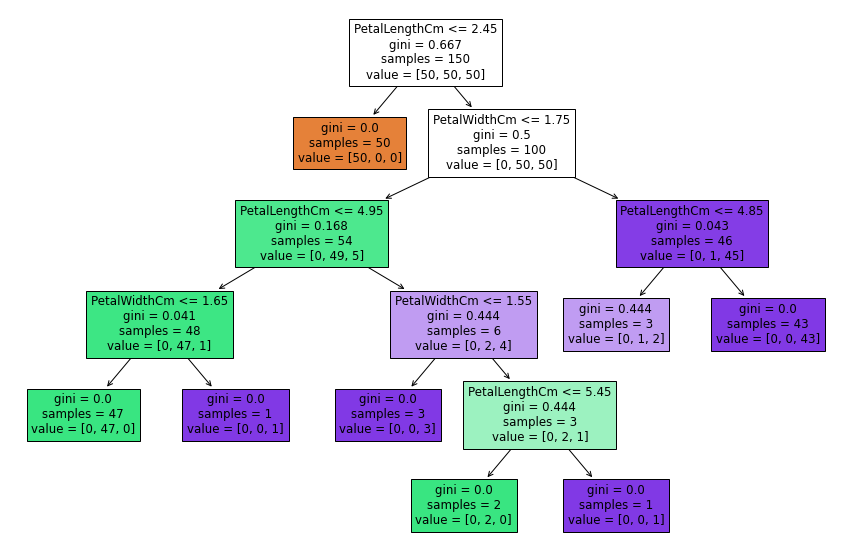

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15, 10))
df = tree.plot_tree(model, feature_names=['PetalLengthCm', 'PetalWidthCm'], filled=True)

## Энтропия?

<div>
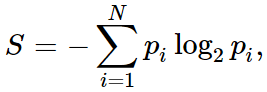
</div>

где $p_i$ это вероятность нахождения элемента в выборке.

Энтропия - это очень важное понятие, используемое в физике, теории информации и других областях. Энтропию можно описать как степень хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

In [9]:
df = pd.DataFrame({'X1': [1,1,1,0,0,0,0,1],
                   'X2': [0,0,0,1,0,0,0,1],
                   'Y': [1,1,1,1,0,0,0,0]})
df

,X1,X2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [10]:
X = df[['X1', 'X2']]
y = df['Y']